We start with the small graph from the lecture, where we number the vertices as 
$$
(s,a,b,t) : \quad(0,1,2,3)
$$

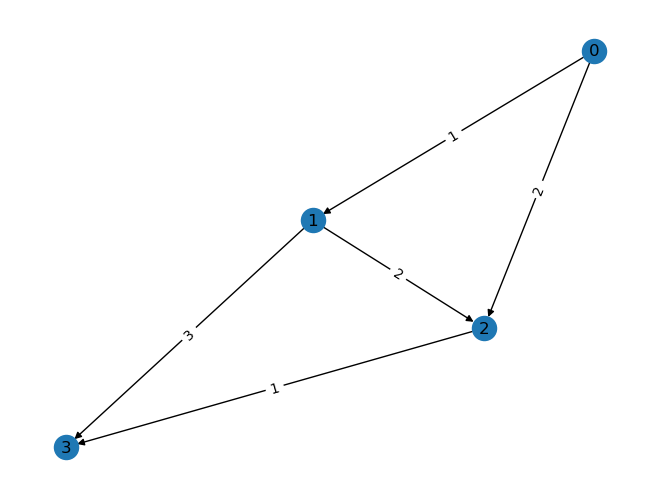

In [34]:
import numpy as np
import networkx as nx

E, w = [[0,1], [0,2], [1,2], [1,3], [2,3]], [1, 2, 2, 3,1]
G = nx.DiGraph(E)
weights = {(e[0], e[1]):w[i] for i,e in enumerate(E)}
nx.set_edge_attributes(G, values = weights, name = 'weight')

# draw yje graph
pos = nx.spring_layout(G, seed=7)
nx.draw(G, pos, with_labels = True)
edge_labels = nx.get_edge_attributes(G, "weight")
d=nx.draw_networkx_edge_labels(G, pos, edge_labels)

Now we have to lern a bit of *networkx*:

- An edge (better an **arc** in the directed case) is just a tuple of the indices of the vertices.
- we obtain the set of leaving edges of a vertex v by *G.out_edges(v)*
- note we use *fancy indexing* of **numpy** for the minimizing of *lam* over the actual set *U*
- remember we shouldn't use 'lambda' in python, since this is a reserved word.

No we can implement Dijkstra:

In [35]:
U = [0,1,2,3]
lam = np.ones(4)*np.inf
lam[0] = 0
while len(U):
    u = np.argmin(lam[U])
    u = U[u]
    print(f"{u=} {lam=} {U=}")
    for e in G.out_edges(u):
        v = e[1]
        alt = lam[u] + weights[e]
        if lam[v] >= alt: 
            lam[v] = alt
    U.remove(u)

u=0 lam=array([ 0., inf, inf, inf]) U=[0, 1, 2, 3]
u=1 lam=array([ 0.,  1.,  2., inf]) U=[1, 2, 3]
u=2 lam=array([0., 1., 2., 4.]) U=[2, 3]
u=3 lam=array([0., 1., 2., 3.]) U=[3]


Up to you now to modify the code to create the shortest path.

And try with a more interesting example!